### 0. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

### 1. Load and Explore The Dataset

In [25]:
data = pd.read_csv('./walmart_cleaned.csv')
data.head()

Unnamed: 0  Store        Date  IsHoliday  Dept  Weekly_Sales  Temperature  \
0           0      1  2010-02-05          0   1.0      24924.50        42.31   
1           1      1  2010-02-05          0  26.0      11737.12        42.31   
2           2      1  2010-02-05          0  17.0      13223.76        42.31   
3           3      1  2010-02-05          0  45.0         37.44        42.31   
4           4      1  2010-02-05          0  28.0       1085.29        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        0.0        0.0        0.0        0.0        0.0   
1       2.572        0.0        0.0        0.0        0.0        0.0   
2       2.572        0.0        0.0        0.0        0.0        0.0   
3       2.572        0.0        0.0        0.0        0.0        0.0   
4       2.572        0.0        0.0        0.0        0.0        0.0   

          CPI  Unemployment  Type    Size  
0  211.096358         8.106     3  151315  
1  211.096358         8.106     3  151315  
2  211.096358         8.106     3  151315  
3  211.096358         8.106     3  151315  
4  211.096358         8.106     3  151315

In [4]:
data.describe()

Unnamed: 0          Store      IsHoliday           Dept  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean   211611.321278      22.200546       0.070358      44.260317   
std    122195.149363      12.785297       0.255750      30.492054   
min         0.000000       1.000000       0.000000       1.000000   
25%    105782.250000      11.000000       0.000000      18.000000   
50%    211603.500000      22.000000       0.000000      37.000000   
75%    317424.750000      33.000000       0.000000      74.000000   
max    423285.000000      45.000000       1.000000      99.000000   

        Weekly_Sales    Temperature     Fuel_Price      MarkDown1  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123      60.090059       3.361027    2590.074819   
std     22711.183519      18.447931       0.458515    6052.385934   
min     -4988.940000      -2.060000       2.472000       0.000000   
25%      2079.650000      46.680000       2.933000       0.000000   
50%      7612.030000      62.090000       3.452000       0.000000   
75%     20205.852500      74.280000       3.738000    2809.050000   
max    693099.360000     100.140000       4.468000   88646.760000   

           MarkDown2      MarkDown3      MarkDown4      MarkDown5  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean      879.974298     468.087665    1083.132268    1662.772385   
std      5084.538801    5528.873453    3894.529945    4207.629321   
min      -265.760000     -29.100000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         2.200000       4.540000     425.290000    2168.040000   
max    104519.540000  141630.610000   67474.850000  108519.280000   

                 CPI   Unemployment           Type           Size  
count  421570.000000  421570.000000  421570.000000  421570.000000  
mean      171.201947       7.960289       2.410088  136727.915739  
std        39.159276       1.863296       0.666337   60980.583328  
min       126.064000       3.879000       1.000000   34875.000000  
25%       132.022667       6.891000       2.000000   93638.000000  
50%       182.318780       7.866000       3.000000  140167.000000  
75%       212.416993       8.572000       3.000000  202505.000000  
max       227.232807      14.313000       3.000000  219622.000000

In [26]:
data=data.drop(['Unnamed: 0'],axis=1)

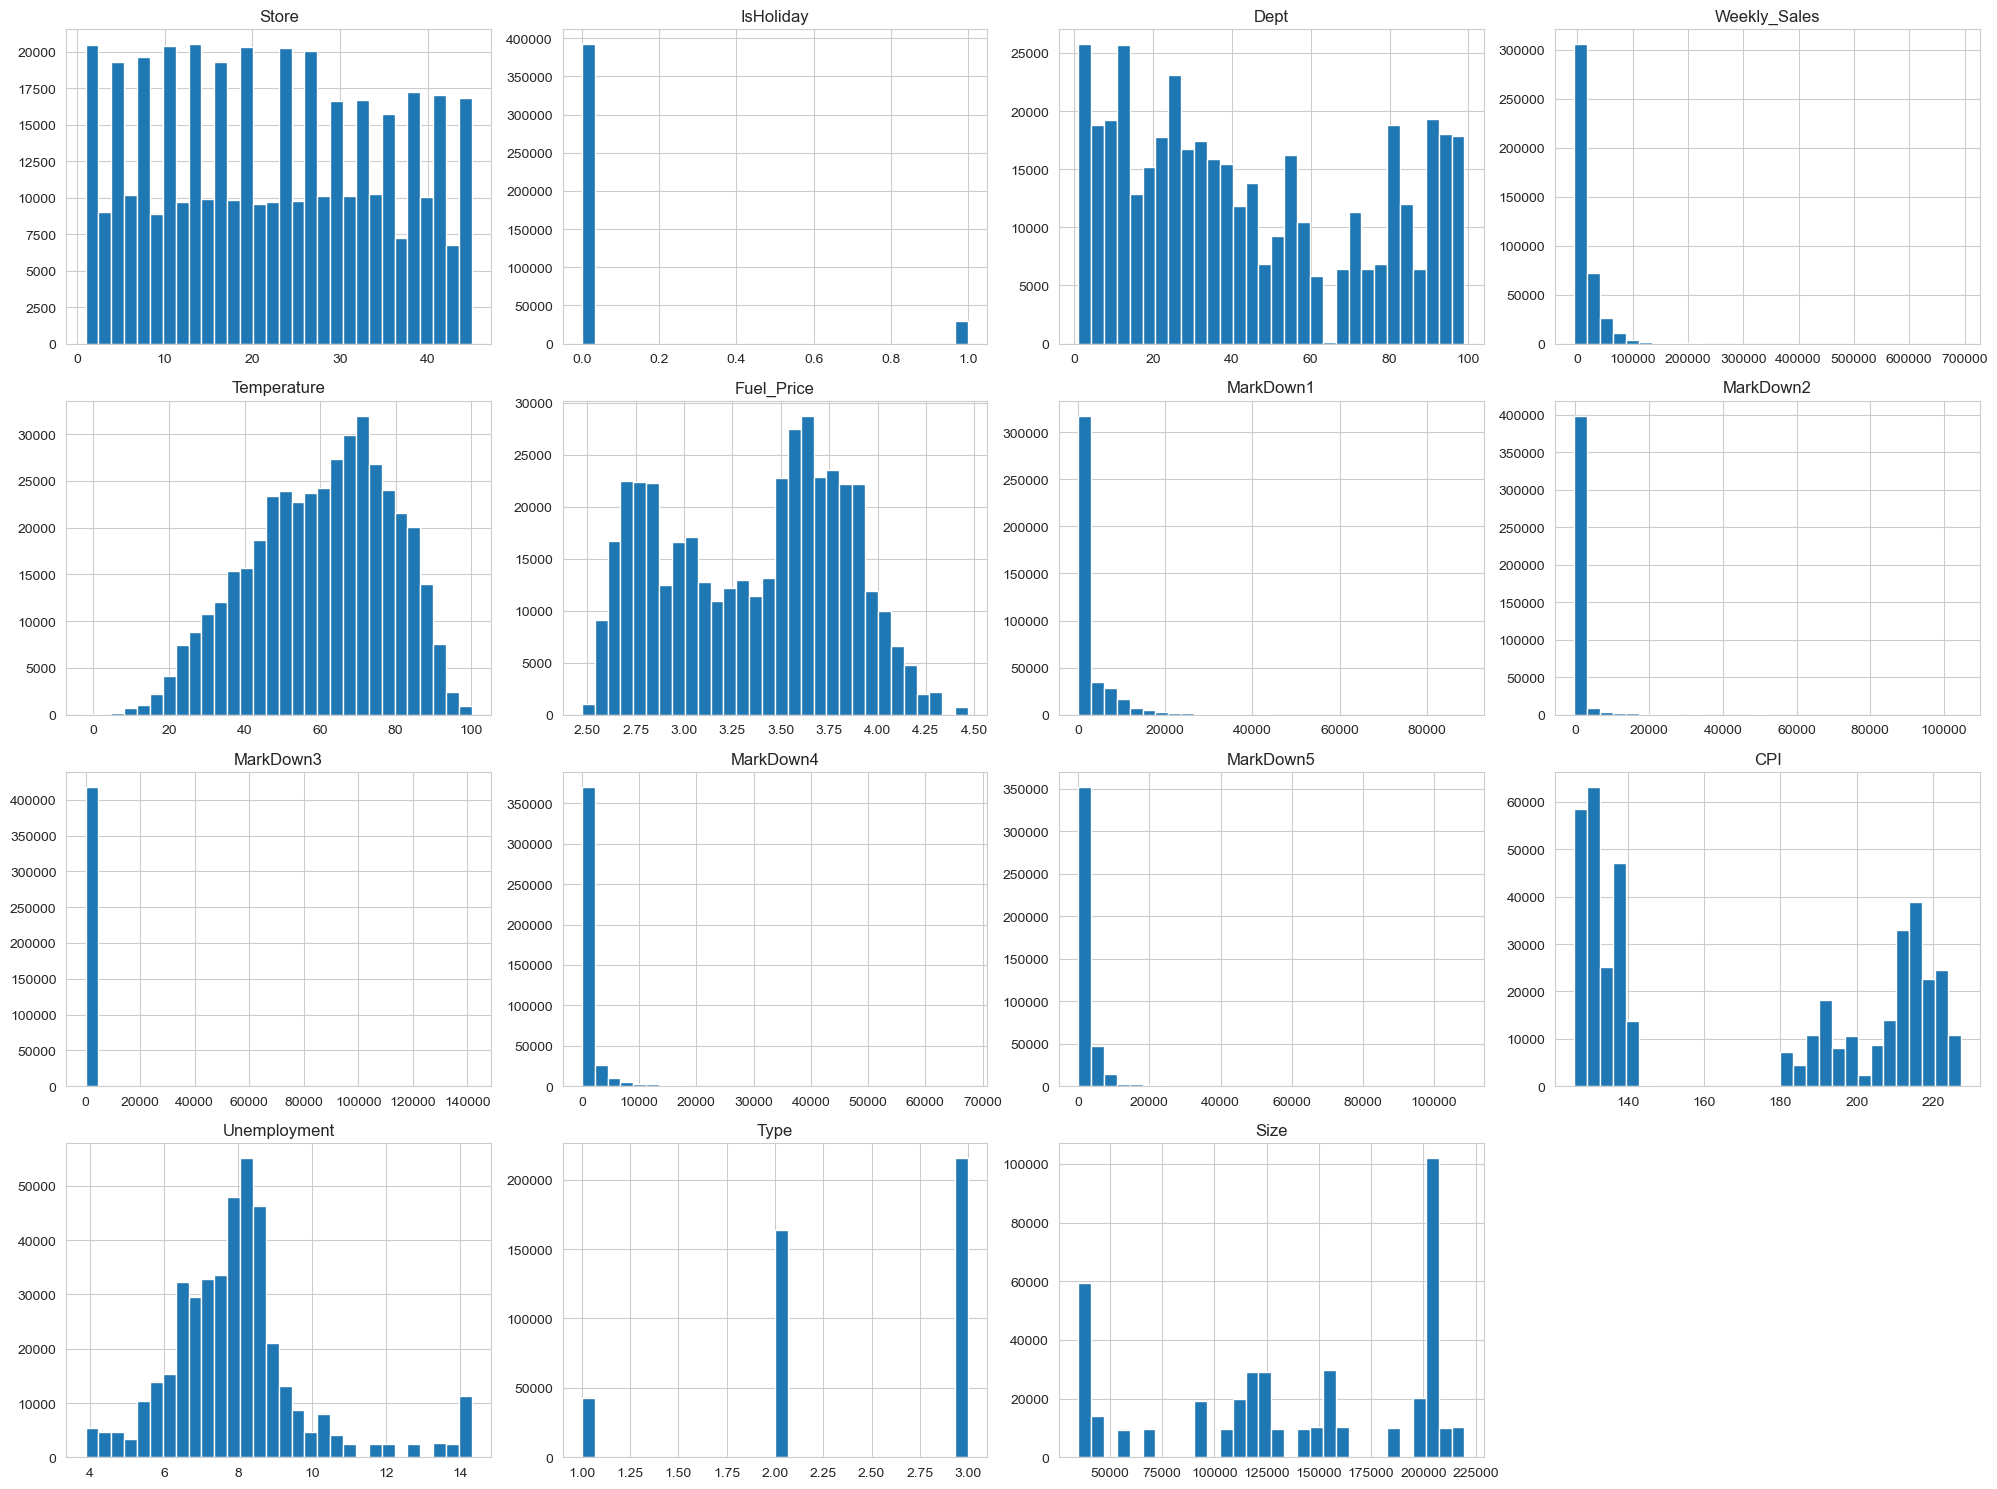

In [19]:
sns.set_style("whitegrid")

data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [7]:
### we need to see the types of the data to see if anything need to be converted
pd.DataFrame(data.dtypes, columns=['Type']).T

Store    Date IsHoliday     Dept Weekly_Sales Temperature Fuel_Price  \
Type  int64  object     int64  float64      float64     float64    float64   

     MarkDown1 MarkDown2 MarkDown3 MarkDown4 MarkDown5      CPI Unemployment  \
Type   float64   float64   float64   float64   float64  float64      float64   

       Type   Size  
Type  int64  int64

In [5]:
### we can notice from the previous output that all of the columns are int64 or float64 except
### for the Date column, we'll solve this in the next section (preprocessing)

### 2. Data Preprocessing

In [27]:
# Remove rows with negative Weekly_Sales
data = data[data["Weekly_Sales"] >= 0]

In [28]:
###Converting the Date column in Date Time Format
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data.head()

Store       Date  IsHoliday  Dept  Weekly_Sales  Temperature  Fuel_Price  \
0      1 2010-02-05          0   1.0      24924.50        42.31       2.572   
1      1 2010-02-05          0  26.0      11737.12        42.31       2.572   
2      1 2010-02-05          0  17.0      13223.76        42.31       2.572   
3      1 2010-02-05          0  45.0         37.44        42.31       2.572   
4      1 2010-02-05          0  28.0       1085.29        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  ...  MarkDown5         CPI  Unemployment  \
0        0.0        0.0        0.0  ...        0.0  211.096358         8.106   
1        0.0        0.0        0.0  ...        0.0  211.096358         8.106   
2        0.0        0.0        0.0  ...        0.0  211.096358         8.106   
3        0.0        0.0        0.0  ...        0.0  211.096358         8.106   
4        0.0        0.0        0.0  ...        0.0  211.096358         8.106   

   Type    Size  Year  Month  Week  DayOfTheWeek  Day  
0     3  151315  2010      2     5             4    5  
1     3  151315  2010      2     5             4    5  
2     3  151315  2010      2     5             4    5  
3     3  151315  2010      2     5             4    5  
4     3  151315  2010      2     5             4    5  

[5 rows x 21 columns]

In [11]:
### Cheaking NA values
data.isna().sum()

Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
DayOfTheWeek    0
Day             0
dtype: int64

In [10]:
### No NA values in our data

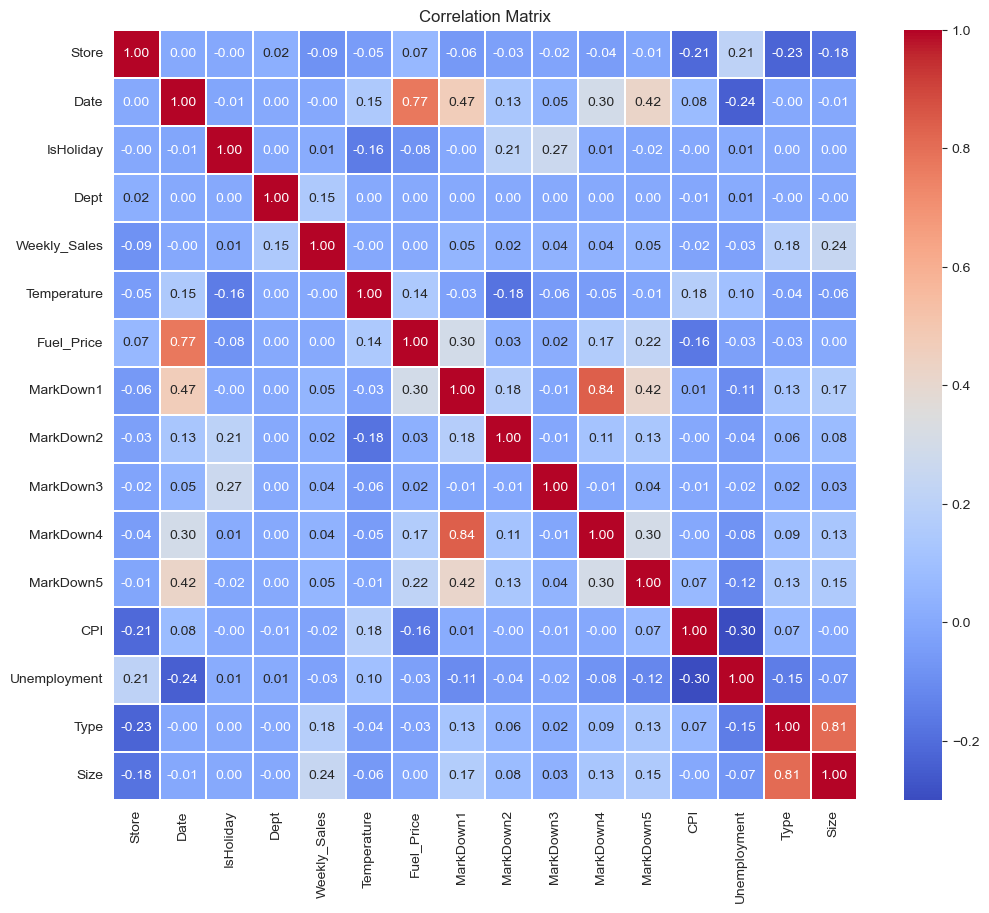

In [29]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()

In [10]:
###Selecting a subset of the dataset
col_features=['Date', 'IsHoliday', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
df = data[col_features]


In [12]:
### in time series problem it's most likely to set the Date As Index, but it's not necessary
df.set_index('Date', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420285 entries, 2010-02-05 to 2012-10-26
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   IsHoliday     420285 non-null  int64  
 1   Weekly_Sales  420285 non-null  float64
 2   Temperature   420285 non-null  float64
 3   Fuel_Price    420285 non-null  float64
 4   MarkDown1     420285 non-null  float64
 5   MarkDown2     420285 non-null  float64
 6   MarkDown3     420285 non-null  float64
 7   MarkDown4     420285 non-null  float64
 8   MarkDown5     420285 non-null  float64
 9   CPI           420285 non-null  float64
 10  Unemployment  420285 non-null  float64
 11  Size          420285 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 41.7 MB


### 3. Fit the dataset using base models

### 3.1. KNN

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

df_scaled=df.copy()
# Initialize the StandardScaler
scaler = StandardScaler()
### No Need To Scale IsHoliday because it's already between 0 and 1
features_to_be_scaled=['Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size']
df_scaled[features_to_be_scaled] = scaler.fit_transform(df_scaled[features_to_be_scaled])

### we will try different n_neighbors to reach the optimum number
#nbrs = NearestNeighbors(n_neighbors = 3)
#nbrs = NearestNeighbors(n_neighbors = 5)
nbrs = NearestNeighbors(n_neighbors = 10)
# fit model
nbrs.fit(df_scaled.values)

NearestNeighbors(n_neighbors=10)

In [18]:
# distances and indexes of k-neaighbors from model outputs
distances, indexes = nbrs.kneighbors(df_scaled.values)


In [19]:
distances = pd.DataFrame(distances)
distances_mean = distances.mean(axis =1)
distances_mean

0         0.144475
1         0.038536
2         0.050681
3         0.026852
4         0.024361
            ...   
420280    0.225526
420281    0.023152
420282    0.028520
420283    0.015128
420284    0.009492
Length: 420285, dtype: float64

In [20]:
distances_mean.describe()

count    420285.000000
mean          0.083142
std           0.139485
min           0.000184
25%           0.020020
50%           0.041113
75%           0.090400
max          14.133607
dtype: float64

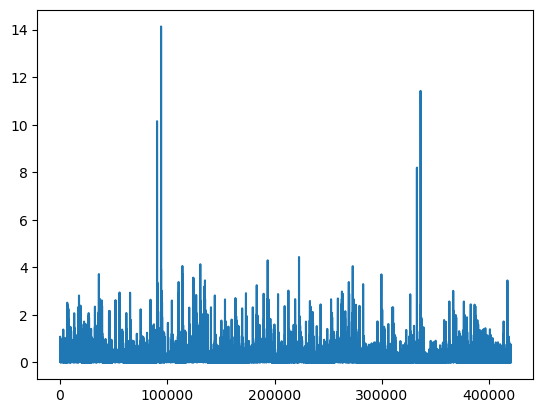

In [18]:
plt.plot(distances_mean)

In [19]:
### visualy we can see that most of the points have an average distance <=2
th=2
outlier_index = np.where(distances_mean > th)
outlier_index

(array([  6747,   6759,   7471,   7749,  13225,  16838,  16960,  16975,
         17385,  17697,  19094,  19133,  19527,  26709,  32552,  36105,
         36227,  36242,  36317,  36514,  36603,  36694,  36970,  36980,
         37020,  37092,  38867,  38873,  39194,  39224,  45665,  45740,
         46302,  51722,  55478,  61808,  65296,  75154,  84346,  90433,
         90742,  90752,  94024,  94158,  94188,  94190,  94236,  94452,
         94503,  94547,  94876,  94946,  95073, 104250, 110545, 110774,
        114051, 114295, 120427, 124123, 124225, 124245, 124247, 124269,
        124276, 124287, 124316, 124433, 124726, 125022, 125095, 125150,
        125233, 125297, 125810, 126913, 126915, 127266, 130749, 131045,
        133606, 134264, 134374, 134400, 134488, 134721, 134791, 134824,
        135098, 135180, 135226, 135369, 135841, 137444, 140694, 144282,
        153774, 163511, 163521, 169767, 173323, 179672, 183233, 183365,
        189785, 193368, 193491, 193503, 193551, 193568, 193966, 

In [20]:
outlier_values = df.iloc[outlier_index]
outlier_values

IsHoliday  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
Date                                                                      
2011-11-25          1     186516.35        60.14       3.236     410.31   
2011-11-25          1     203670.47        60.14       3.236     410.31   
2012-02-03          0     147179.82        56.55       3.360   34577.06   
2012-03-02          0     138638.98        60.96       3.630   15441.40   
2010-11-26          1     285353.53        62.98       2.735       0.00   
...               ...           ...          ...         ...        ...   
2012-02-03          0     113179.16        27.86       3.633   37980.28   
2010-11-26          1     290809.17        25.30       2.742       0.00   
2011-11-25          1     271392.45        36.37       3.424     256.95   
2012-02-03          0     130392.27        31.65       3.031   42353.77   
2011-11-25          1     198041.11        48.71       3.492     140.87   

            MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
Date                                                                 
2011-11-25      98.00   55805.51       8.00     554.92  218.467621   
2011-11-25      98.00   55805.51       8.00     554.92  218.467621   
2012-02-03    3579.21     160.53   32403.87    5630.40  220.172015   
2012-03-02    1569.00      10.80   25390.88    8067.61  220.848045   
2010-11-26       0.00       0.00       0.00       0.00  211.406287   
...               ...        ...        ...        ...         ...   
2012-02-03    2731.05     108.41   23597.14    5940.88  137.063258   
2010-11-26       0.00       0.00       0.00       0.00  191.012180   
2011-11-25    1053.98   79621.20      40.76    2616.56  195.770400   
2012-02-03    4696.86     231.92   46238.28    6379.49  196.872892   
2011-11-25     384.82   26961.99      28.59    1110.12  188.350400   

            Unemployment    Size  
Date                              
2011-11-25         7.866  151315  
2011-11-25         7.866  151315  
2012-02-03         7.348  151315  
2012-03-02         7.348  151315  
2010-11-26         8.163  202307  
...                  ...     ...  
2012-02-03         4.261  155083  
2010-11-26         7.508  196321  
2011-11-25         6.759  196321  
2012-02-03         6.589  196321  
2011-11-25         8.523  118221  

[171 rows x 12 columns]

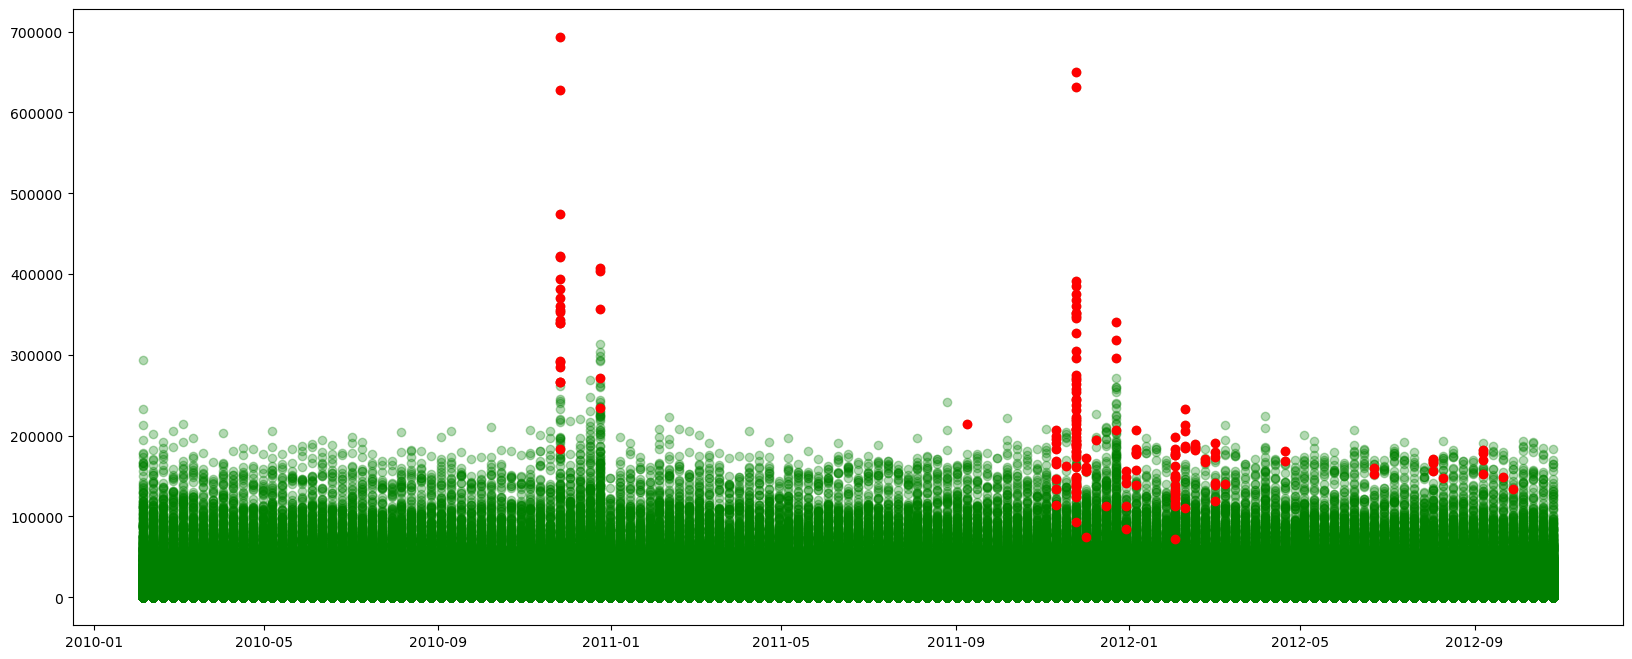

In [21]:
# plot data
plt.figure(figsize=(20,8))
plt.scatter(df.index,df["Weekly_Sales"] ,color = "g",alpha=0.3)
# plot outlier values (where outlier values= df.iloc[outlier_index])
otlr_val = df.iloc[outlier_index]
plt.scatter(otlr_val.index,otlr_val["Weekly_Sales"], color = "r")

In [21]:
### let's try lower threshold
th=1.5
outlier_index = np.where(distances_mean > th)
outlier_index

(array([  6624,   6728,   6747,   6759,   6869,   7158,   7178,   7467,
          7471,   7550,   7637,   7749,   7757,  13225,  16838,  16844,
         16960,  16975,  17031,  17119,  17319,  17385,  17429,  17448,
         17657,  17697,  17752,  17835,  17940,  19094,  19133,  19527,
         19557,  26364,  26383,  26442,  26709,  26763,  27054,  32552,
         32817,  36076,  36105,  36227,  36242,  36252,  36265,  36288,
         36317,  36331,  36371,  36503,  36514,  36529,  36603,  36666,
         36694,  36720,  36750,  36944,  36970,  36980,  37008,  37020,
         37034,  37092,  37097,  37118,  38867,  38873,  45665,  45740,
         46302,  51722,  55435,  55478,  55819,  61808,  65296,  65607,
         65662,  75154,  84346,  84986,  90433,  90675,  90742,  90752,
         94024,  94074,  94158,  94188,  94190,  94236,  94316,  94452,
         94503,  94547,  94876,  94946,  95073,  95132,  95218, 104250,
        110545, 110774, 113989, 114051, 114231, 114295, 120427, 

In [22]:
outlier_values = df.iloc[outlier_index]
outlier_values

IsHoliday  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
Date                                                                      
2011-11-11          0     165723.32        59.11       3.297   10382.90   
2011-11-25          1     112688.97        60.14       3.236     410.31   
2011-11-25          1     186516.35        60.14       3.236     410.31   
2011-11-25          1     203670.47        60.14       3.236     410.31   
2011-12-09          0     165633.02        43.93       3.158    4640.65   
...               ...           ...          ...         ...        ...   
2012-08-03          0     128724.44        73.16       3.528   40493.45   
2012-10-12          0     145984.90        39.38       3.760    1570.23   
2010-11-26          1     240758.86        46.15       3.039       0.00   
2011-11-25          1      84018.86        48.71       3.492     140.87   
2011-11-25          1     198041.11        48.71       3.492     140.87   

            MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
Date                                                                 
2011-11-11    6115.67     215.07    2406.62    6551.42  217.998085   
2011-11-25      98.00   55805.51       8.00     554.92  218.467621   
2011-11-25      98.00   55805.51       8.00     554.92  218.467621   
2011-11-25      98.00   55805.51       8.00     554.92  218.467621   
2011-12-09      19.00     105.02    3639.42   14461.82  218.961846   
...               ...        ...        ...        ...         ...   
2012-08-03      83.46      44.56   23826.20    3666.08  198.029389   
2012-10-12       0.00      26.31     834.80   14421.12  199.053937   
2010-11-26       0.00       0.00       0.00       0.00  182.783277   
2011-11-25     384.82   26961.99      28.59    1110.12  188.350400   
2011-11-25     384.82   26961.99      28.59    1110.12  188.350400   

            Unemployment    Size  
Date                              
2011-11-11         7.866  151315  
2011-11-25         7.866  151315  
2011-11-25         7.866  151315  
2011-11-25         7.866  151315  
2011-12-09         7.866  151315  
...                  ...     ...  
2012-08-03         6.432  196321  
2012-10-12         6.195  196321  
2010-11-26         8.724  118221  
2011-11-25         8.523  118221  
2011-11-25         8.523  118221  

[392 rows x 12 columns]

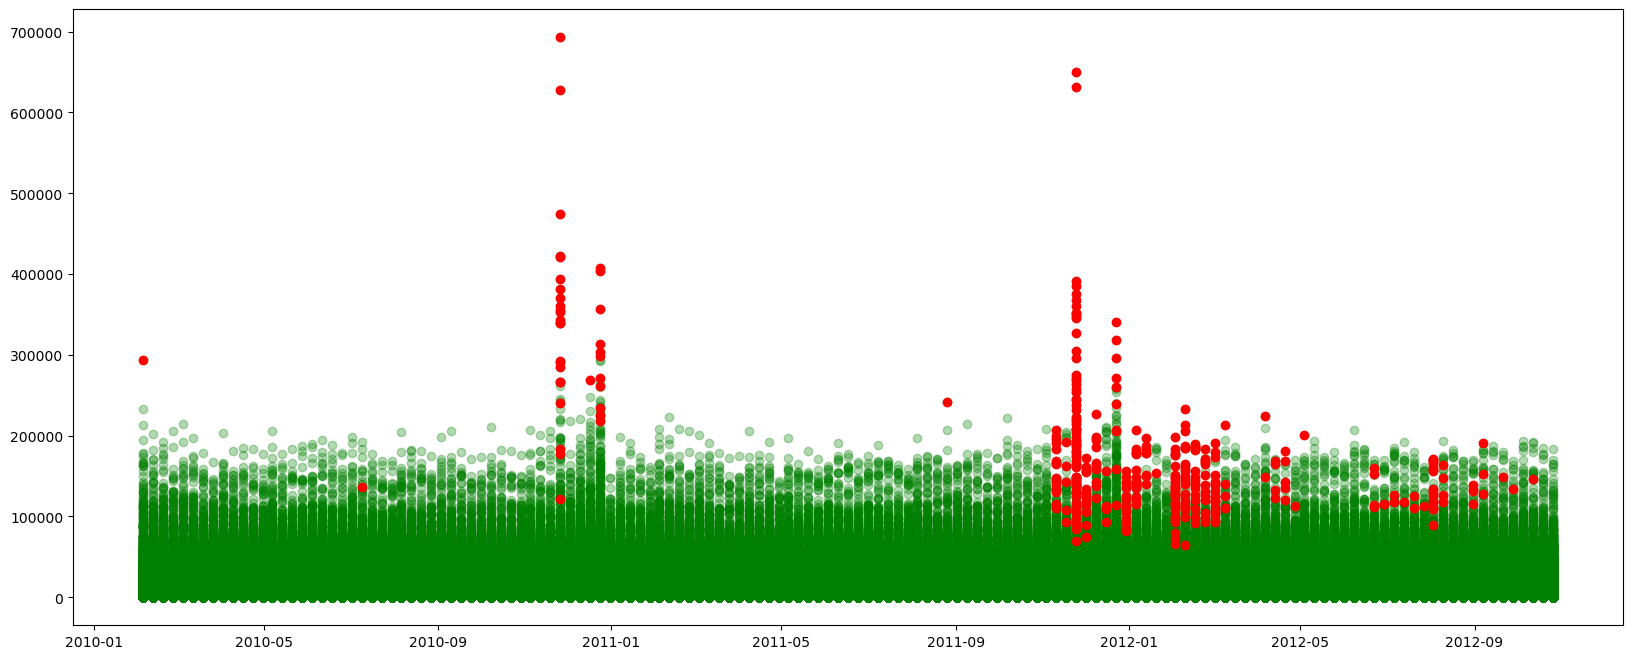

In [23]:
# plot data
plt.figure(figsize=(20,8))
plt.scatter(df.index,df["Weekly_Sales"] ,color = "g",alpha=0.3)
# plot outlier values (where outlier values= df.iloc[outlier_index])
otlr_val = df.iloc[outlier_index]
plt.scatter(otlr_val.index,otlr_val["Weekly_Sales"], color = "r")

### Analyzing KNN Results for Weekly Sales Anomaly Detection
The KNN algorithm effectively identifies anomalies in weekly sales, particularly highlighting increases in sales trends. However, it may overlook anomalies associated with small weekly sales figures. This aligns with the primary goal of detecting significant deviations to prevent stockouts. Despite limited detection of minor anomalies, KNN provides valuable insights for proactive inventory management and strategic decision-making. However, leveraging the power of isolation forest and other algorithms can significantly enhance our analysis by capturing a broader range of anomalies.

### 3.2. Isolation Forest

### 3.2.1. Univariate Isolation Forest on Weekly_sales

In [22]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=1000,max_samples='auto',contamination=float(0.1),max_features=1.0,random_state=42)
model.fit(df[["Weekly_Sales"]])

IsolationForest(contamination=0.1, n_estimators=1000, random_state=42)

In [23]:
df2 = df.copy()
df2['anomaly_scores']=model.decision_function(df2[['Weekly_Sales']])
df2['anomaly']=model.predict(df[['Weekly_Sales']])
df2.head(50)

IsHoliday  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
Date                                                                      
2010-02-05          0      24924.50        42.31       2.572        0.0   
2010-02-05          0      11737.12        42.31       2.572        0.0   
2010-02-05          0      13223.76        42.31       2.572        0.0   
2010-02-05          0         37.44        42.31       2.572        0.0   
2010-02-05          0       1085.29        42.31       2.572        0.0   
2010-02-05          0      46729.77        42.31       2.572        0.0   
2010-02-05          0      21249.31        42.31       2.572        0.0   
2010-02-05          0      32229.38        42.31       2.572        0.0   
2010-02-05          0       7659.97        42.31       2.572        0.0   
2010-02-05          0      21084.08        42.31       2.572        0.0   
2010-02-05          0       5711.19        42.31       2.572        0.0   
2010-02-05          0      16930.99        42.31       2.572        0.0   
2010-02-05          0      35972.49        42.31       2.572        0.0   
2010-02-05          0      14350.83        42.31       2.572        0.0   
2010-02-05          0       1947.05        42.31       2.572        0.0   
2010-02-05          0       3508.04        42.31       2.572        0.0   
2010-02-05          0      12251.94        42.31       2.572        0.0   
2010-02-05          0     115564.35        42.31       2.572        0.0   
2010-02-05          0      64494.87        42.31       2.572        0.0   
2010-02-05          0      24146.49        42.31       2.572        0.0   
2010-02-05          0      10217.55        42.31       2.572        0.0   
2010-02-05          0     106690.06        42.31       2.572        0.0   
2010-02-05          0      50605.27        42.31       2.572        0.0   
2010-02-05          0       2293.00        42.31       2.572        0.0   
2010-02-05          0          1.16        42.31       2.572        0.0   
2010-02-05          0      39954.04        42.31       2.572        0.0   
2010-02-05          0      15694.17        42.31       2.572        0.0   
2010-02-05          0       7024.95        42.31       2.572        0.0   
2010-02-05          0       2567.36        42.31       2.572        0.0   
2010-02-05          0       3455.92        42.31       2.572        0.0   
2010-02-05          0       8589.77        42.31       2.572        0.0   
2010-02-05          0      40129.01        42.31       2.572        0.0   
2010-02-05          0       3825.78        42.31       2.572        0.0   
2010-02-05          0       8414.14        42.31       2.572        0.0   
2010-02-05          0      20837.77        42.31       2.572        0.0   
2010-02-05          0      76419.47        42.31       2.572        0.0   
2010-02-05          0       8449.54        42.31       2.572        0.0   
2010-02-05          0        439.00        42.31       2.572        0.0   
2010-02-05          0      19466.91        42.31       2.572        0.0   
2010-02-05          0      56655.39        42.31       2.572        0.0   
2010-02-05          0      32153.04        42.31       2.572        0.0   
2010-02-05          0       8366.71        42.31       2.572        0.0   
2010-02-05          0      11501.46        42.31       2.572        0.0   
2010-02-05          0         70.00        42.31       2.572        0.0   
2010-02-05          0      62424.14        42.31       2.572        0.0   
2010-02-05          0      13740.12        42.31       2.572        0.0   
2010-02-05          0       8907.63        42.31       2.572        0.0   
2010-02-05          0      11875.84        42.31       2.572        0.0   
2010-02-05          0      30052.75        42.31       2.572        0.0   
2010-02-05          0       5491.00        42.31       2.572        0.0   

            MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
Date                                     

In [24]:
# percantage. of Outliers(expected to be 10%)
df2[df2['anomaly']== -1].shape[0]/df.shape[0]*100

9.991791284485528

In [25]:
###outlier_plot 
def outlier_plot(data,outlier_method_name,x_var,y_var,
                 xaxis_limits=[0,1],yaxis_limits=[0,1]):
    print(f'Outlier Method: {outlier_method_name}')
    print(f"Number of Anomalous Values {len(data[data['anomaly']==-1])}")
    print(f"Number of Non Anomalous Values {len(data[data['anomaly']==1])}")
    print(f"Total Number Of Values {len(data)}")
    
    g=sns.FacetGrid(data,col='anomaly',height=4,hue='anomaly',hue_order=[1,-1])
    g.map(sns.scatterplot,x_var,y_var)
    axes=g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']==-1])} points")
    axes[1].set_title(f"inliers\n{len(data[data['anomaly']==1])} points")
    # Rotate x-axis labels
    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    return g

Outlier Method: Isolation Forest
Number of Anomalous Values 41994
Number of Non Anomalous Values 378291
Total Number Of Values 420285


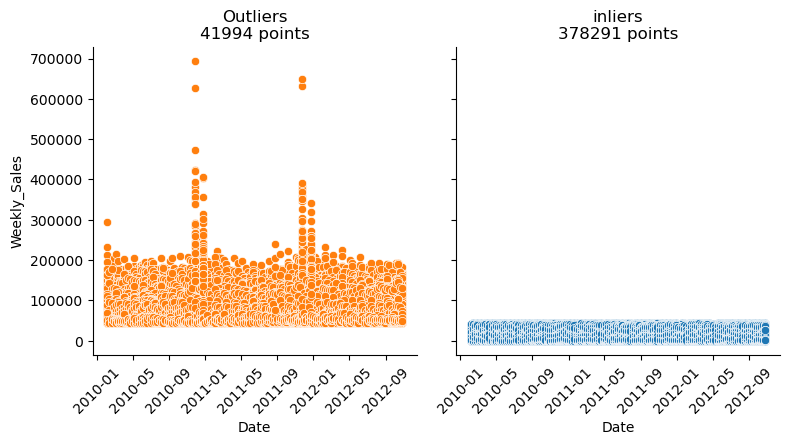

In [26]:
# Convert DatetimeIndex to a column
df2.reset_index(inplace=True)

# Plot the data
outlier_plot(df2, "Isolation Forest", "Date", "Weekly_Sales")

### 3.2.2. Multivariate Isolation Forest on Weekly_Sales

In [27]:
model=IsolationForest(n_estimators=1000,max_samples='auto',contamination=float(0.1),max_features=12,random_state=42)
model.fit(df)

IsolationForest(contamination=0.1, max_features=12, n_estimators=1000,
                random_state=42)

In [28]:
df3=df.copy()
df3['scores']=model.decision_function(df)
df3['anomaly']=model.predict(df)
df3.head()

IsHoliday  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
Date                                                                      
2010-02-05          0      24924.50        42.31       2.572        0.0   
2010-02-05          0      11737.12        42.31       2.572        0.0   
2010-02-05          0      13223.76        42.31       2.572        0.0   
2010-02-05          0         37.44        42.31       2.572        0.0   
2010-02-05          0       1085.29        42.31       2.572        0.0   

            MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
Date                                                                 
2010-02-05        0.0        0.0        0.0        0.0  211.096358   
2010-02-05        0.0        0.0        0.0        0.0  211.096358   
2010-02-05        0.0        0.0        0.0        0.0  211.096358   
2010-02-05        0.0        0.0        0.0        0.0  211.096358   
2010-02-05        0.0        0.0        0.0        0.0  211.096358   

            Unemployment    Size    scores  anomaly  
Date                                                 
2010-02-05         8.106  151315  0.098665        1  
2010-02-05         8.106  151315  0.104615        1  
2010-02-05         8.106  151315  0.104319        1  
2010-02-05         8.106  151315  0.102745        1  
2010-02-05         8.106  151315  0.104239        1

In [29]:
###let's us see some of the anomalies detected to sence it with our human interpretation
df3[df3['anomaly']== -1]

IsHoliday  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
Date                                                                      
2010-02-12          1      36080.86        38.51       2.548       0.00   
2010-02-12          1      36476.40        38.51       2.548       0.00   
2010-02-12          1      39254.57        38.51       2.548       0.00   
2010-02-12          1      35351.21        38.51       2.548       0.00   
2010-02-12          1      70202.02        38.51       2.548       0.00   
...               ...           ...          ...         ...        ...   
2012-09-07          1        128.20        75.70       3.911   11024.45   
2012-09-07          1       3938.63        75.70       3.911   11024.45   
2012-09-07          1        751.80        75.70       3.911   11024.45   
2012-09-07          1      12927.36        75.70       3.911   11024.45   
2012-09-07          1         11.94        75.70       3.911   11024.45   

            MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
Date                                                                 
2010-02-12        0.0       0.00       0.00        0.0  211.242170   
2010-02-12        0.0       0.00       0.00        0.0  211.242170   
2010-02-12        0.0       0.00       0.00        0.0  211.242170   
2010-02-12        0.0       0.00       0.00        0.0  211.242170   
2010-02-12        0.0       0.00       0.00        0.0  211.242170   
...               ...        ...        ...        ...         ...   
2012-09-07       12.8      52.63    1854.77     2055.7  191.577676   
2012-09-07       12.8      52.63    1854.77     2055.7  191.577676   
2012-09-07       12.8      52.63    1854.77     2055.7  191.577676   
2012-09-07       12.8      52.63    1854.77     2055.7  191.577676   
2012-09-07       12.8      52.63    1854.77     2055.7  191.577676   

            Unemployment    Size    scores  anomaly  
Date                                                 
2010-02-12         8.106  151315 -0.001211       -1  
2010-02-12         8.106  151315 -0.001409       -1  
2010-02-12         8.106  151315 -0.002799       -1  
2010-02-12         8.106  151315 -0.000876       -1  
2010-02-12         8.106  151315 -0.025830       -1  
...                  ...     ...       ...      ...  
2012-09-07         8.684  118221 -0.025453       -1  
2012-09-07         8.684  118221 -0.022930       -1  
2012-09-07         8.684  118221 -0.024795       -1  
2012-09-07         8.684  118221 -0.022707       -1  
2012-09-07         8.684  118221 -0.025497       -1  

[42029 rows x 14 columns]

In [30]:
df3[df3['anomaly']== -1][1000:1500]

IsHoliday  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
Date                                                                      
2010-02-12          1      30285.16        38.49       2.548       0.00   
2010-02-12          1      42135.66        38.49       2.548       0.00   
2010-02-12          1     106948.27        38.49       2.548       0.00   
2010-02-12          1      65487.46        38.49       2.548       0.00   
2010-02-12          1      92680.72        38.49       2.548       0.00   
...               ...           ...          ...         ...        ...   
2012-02-03          0      40186.60        55.21       3.360   75149.79   
2012-02-03          0       4676.00        55.21       3.360   75149.79   
2012-02-03          0       6497.19        55.21       3.360   75149.79   
2012-02-03          0      31790.24        55.21       3.360   75149.79   
2012-02-03          0       3455.59        55.21       3.360   75149.79   

            MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
Date                                                                 
2010-02-12       0.00        0.0       0.00       0.00  210.897994   
2010-02-12       0.00        0.0       0.00       0.00  210.897994   
2010-02-12       0.00        0.0       0.00       0.00  210.897994   
2010-02-12       0.00        0.0       0.00       0.00  210.897994   
2010-02-12       0.00        0.0       0.00       0.00  210.897994   
...               ...        ...        ...        ...         ...   
2012-02-03    3818.85      221.4   48159.86    7423.61  219.811885   
2012-02-03    3818.85      221.4   48159.86    7423.61  219.811885   
2012-02-03    3818.85      221.4   48159.86    7423.61  219.811885   
2012-02-03    3818.85      221.4   48159.86    7423.61  219.811885   
2012-02-03    3818.85      221.4   48159.86    7423.61  219.811885   

            Unemployment    Size    scores  anomaly  
Date                                                 
2010-02-12         8.324  202307 -0.003684       -1  
2010-02-12         8.324  202307 -0.009344       -1  
2010-02-12         8.324  202307 -0.053219       -1  
2010-02-12         8.324  202307 -0.023663       -1  
2010-02-12         8.324  202307 -0.044650       -1  
...                  ...     ...       ...      ...  
2012-02-03         7.057  202307 -0.143618       -1  
2012-02-03         7.057  202307 -0.130065       -1  
2012-02-03         7.057  202307 -0.130040       -1  
2012-02-03         7.057  202307 -0.139276       -1  
2012-02-03         7.057  202307 -0.130313       -1  

[500 rows x 14 columns]

In [31]:
df3[df3['anomaly']== -1][30000:30050]

IsHoliday  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
Date                                                                      
2012-05-04          0      41352.37        76.03       4.171   16196.98   
2012-05-04          0      16466.08        76.03       4.171   16196.98   
2012-05-04          0      41826.19        76.03       4.171   16196.98   
2012-05-04          0      11542.40        76.03       4.171   16196.98   
2012-05-04          0      20788.25        76.03       4.171   16196.98   
2012-05-04          0       5981.59        76.03       4.171   16196.98   
2012-05-04          0       1868.97        76.03       4.171   16196.98   
2012-05-04          0       4728.79        76.03       4.171   16196.98   
2012-05-04          0       9722.20        76.03       4.171   16196.98   
2012-05-04          0      35364.85        76.03       4.171   16196.98   
2012-05-04          0       2091.23        76.03       4.171   16196.98   
2012-05-04          0        492.12        76.03       4.171   16196.98   
2012-05-04          0      14277.57        76.03       4.171   16196.98   
2012-05-04          0      59953.46        76.03       4.171   16196.98   
2012-05-11          0      20492.79        77.27       4.186   14847.64   
2012-05-11          0      62334.08        77.27       4.186   14847.64   
2012-05-11          0      18758.11        77.27       4.186   14847.64   
2012-05-11          0         68.92        77.27       4.186   14847.64   
2012-05-11          0       6326.17        77.27       4.186   14847.64   
2012-05-11          0      92860.95        77.27       4.186   14847.64   
2012-05-11          0      20359.60        77.27       4.186   14847.64   
2012-05-11          0       2580.23        77.27       4.186   14847.64   
2012-05-11          0       6009.27        77.27       4.186   14847.64   
2012-05-11          0         35.91        77.27       4.186   14847.64   
2012-05-11          0       8975.09        77.27       4.186   14847.64   
2012-05-11          0      19053.91        77.27       4.186   14847.64   
2012-05-11          0      44612.81        77.27       4.186   14847.64   
2012-05-11          0       6215.02        77.27       4.186   14847.64   
2012-05-11          0       9067.04        77.27       4.186   14847.64   
2012-05-11          0      12735.69        77.27       4.186   14847.64   
2012-05-11          0      14839.76        77.27       4.186   14847.64   
2012-05-11          0      32016.74        77.27       4.186   14847.64   
2012-05-11          0      22650.74        77.27       4.186   14847.64   
2012-05-11          0      43130.66        77.27       4.186   14847.64   
2012-05-11          0       6858.02        77.27       4.186   14847.64   
2012-05-11          0       7182.27        77.27       4.186   14847.64   
2012-05-11          0      17353.68        77.27       4.186   14847.64   
2012-05-11          0       1130.07        77.27       4.186   14847.64   
2012-05-11          0       6994.67        77.27       4.186   14847.64   
2012-05-11          0       2001.87        77.27       4.186   14847.64   
2012-05-11          0      95121.98        77.27       4.186   14847.64   
2012-05-11          0      20822.64        77.27       4.186   14847.64   
2012-05-11          0        558.00        77.27       4.186   14847.64   
2012-05-11          0      35179.59        77.27       4.186   14847.64   
2012-05-11          0      11733.75        77.27       4.186   14847.64   
2012-05-11          0       3986.61        77.27       4.186   14847.64   
2012-05-11          0      15758.03        77.27       4.186   14847.64   
2012-05-11          0       2430.00        77.27       4.186   14847.64   
2012-05-11          0      23114.22        77.27       4.186   14847.64   
2012-05-11          0      16084.03        77.27       4.186   14847.64   

            MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
Date                                     

Outlier Method: Isolation Forest
Number of Anomalous Values 42029
Number of Non Anomalous Values 378256
Total Number Of Values 420285


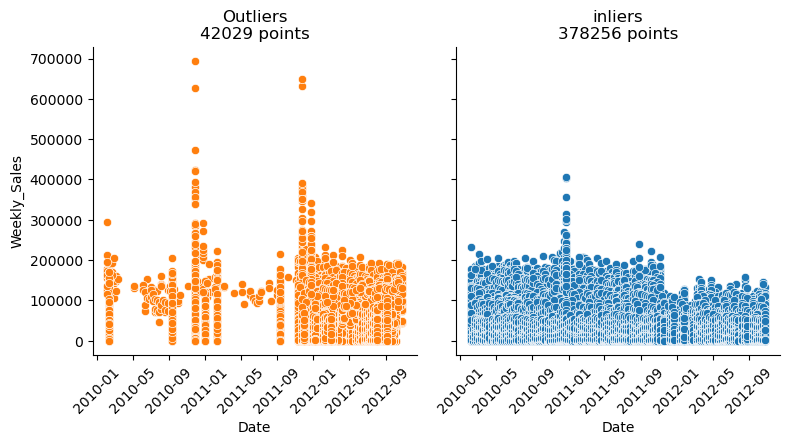

In [32]:
# Convert DatetimeIndex to a column
df3.reset_index(inplace=True)

# Plot the data
outlier_plot(df3, "Isolation Forest", "Date", "Weekly_Sales")

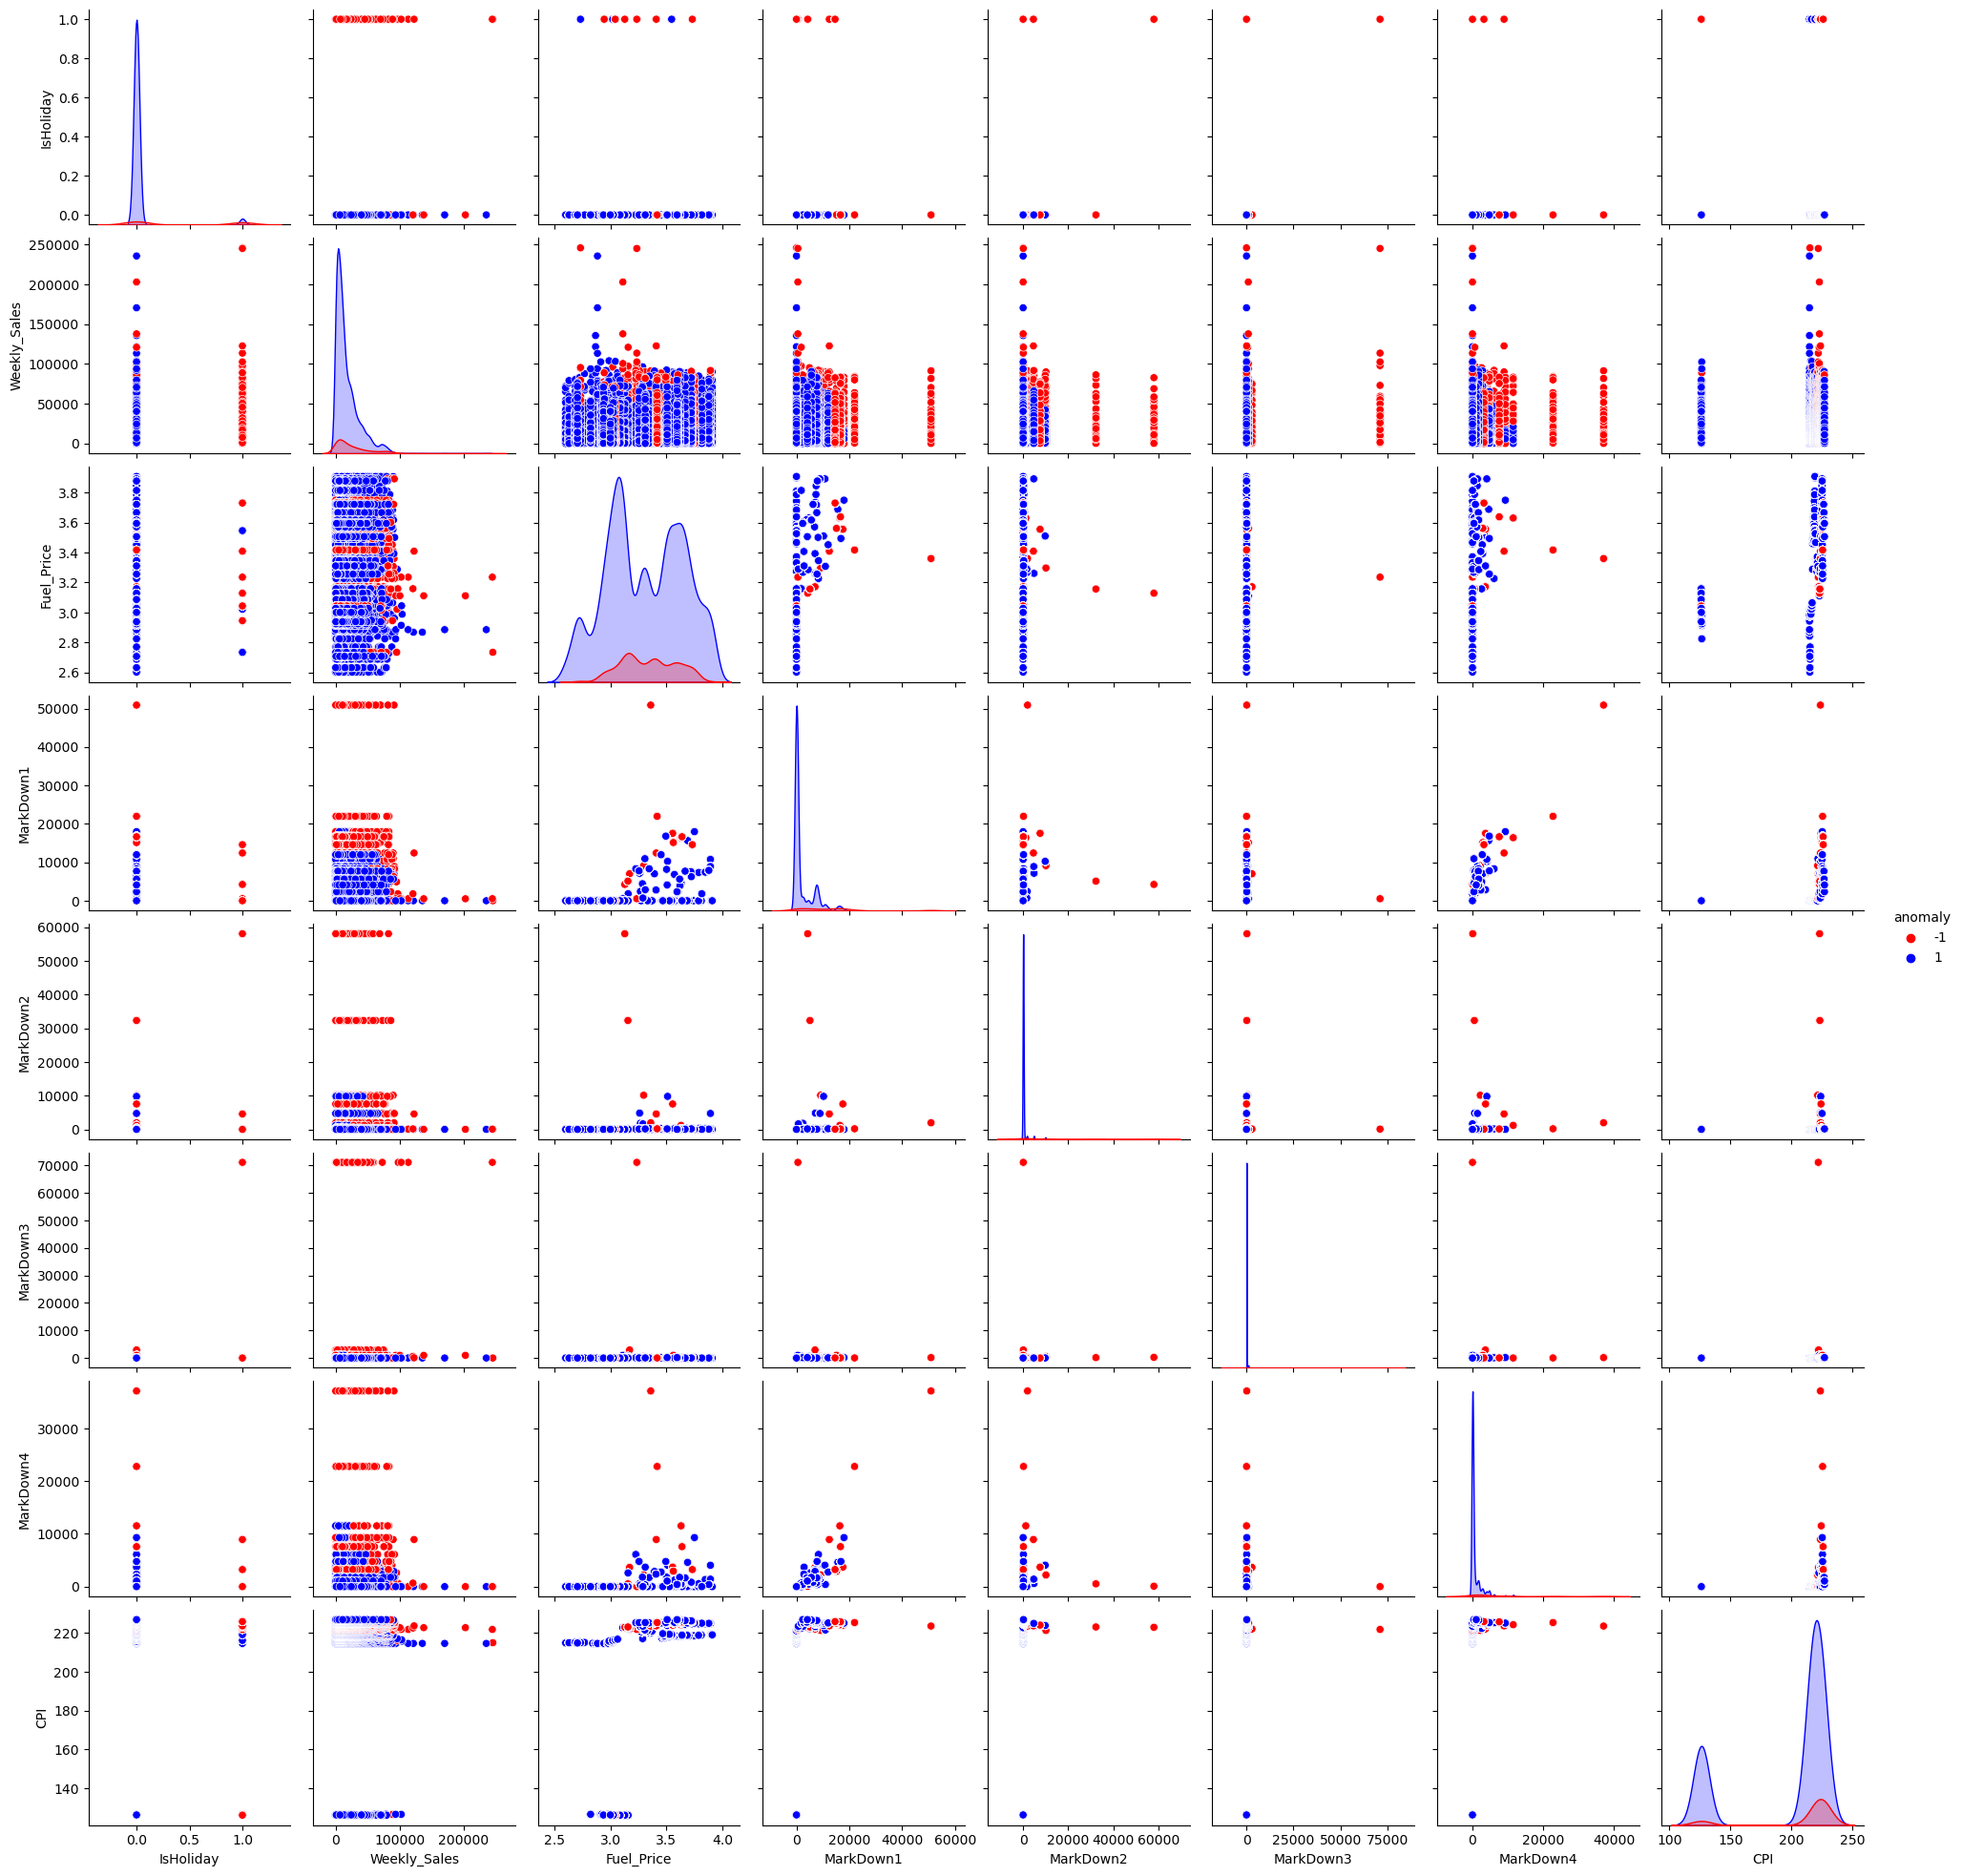

In [43]:
columns_to_plot = ['IsHoliday', 'Weekly_Sales', 'Fuel_Price', 'MarkDown1', 
                   'MarkDown2', 'MarkDown3', 'MarkDown4', 'CPI']
sns.pairplot(data=df3[100000:110000], vars=columns_to_plot, hue="anomaly", palette=['red','blue'])

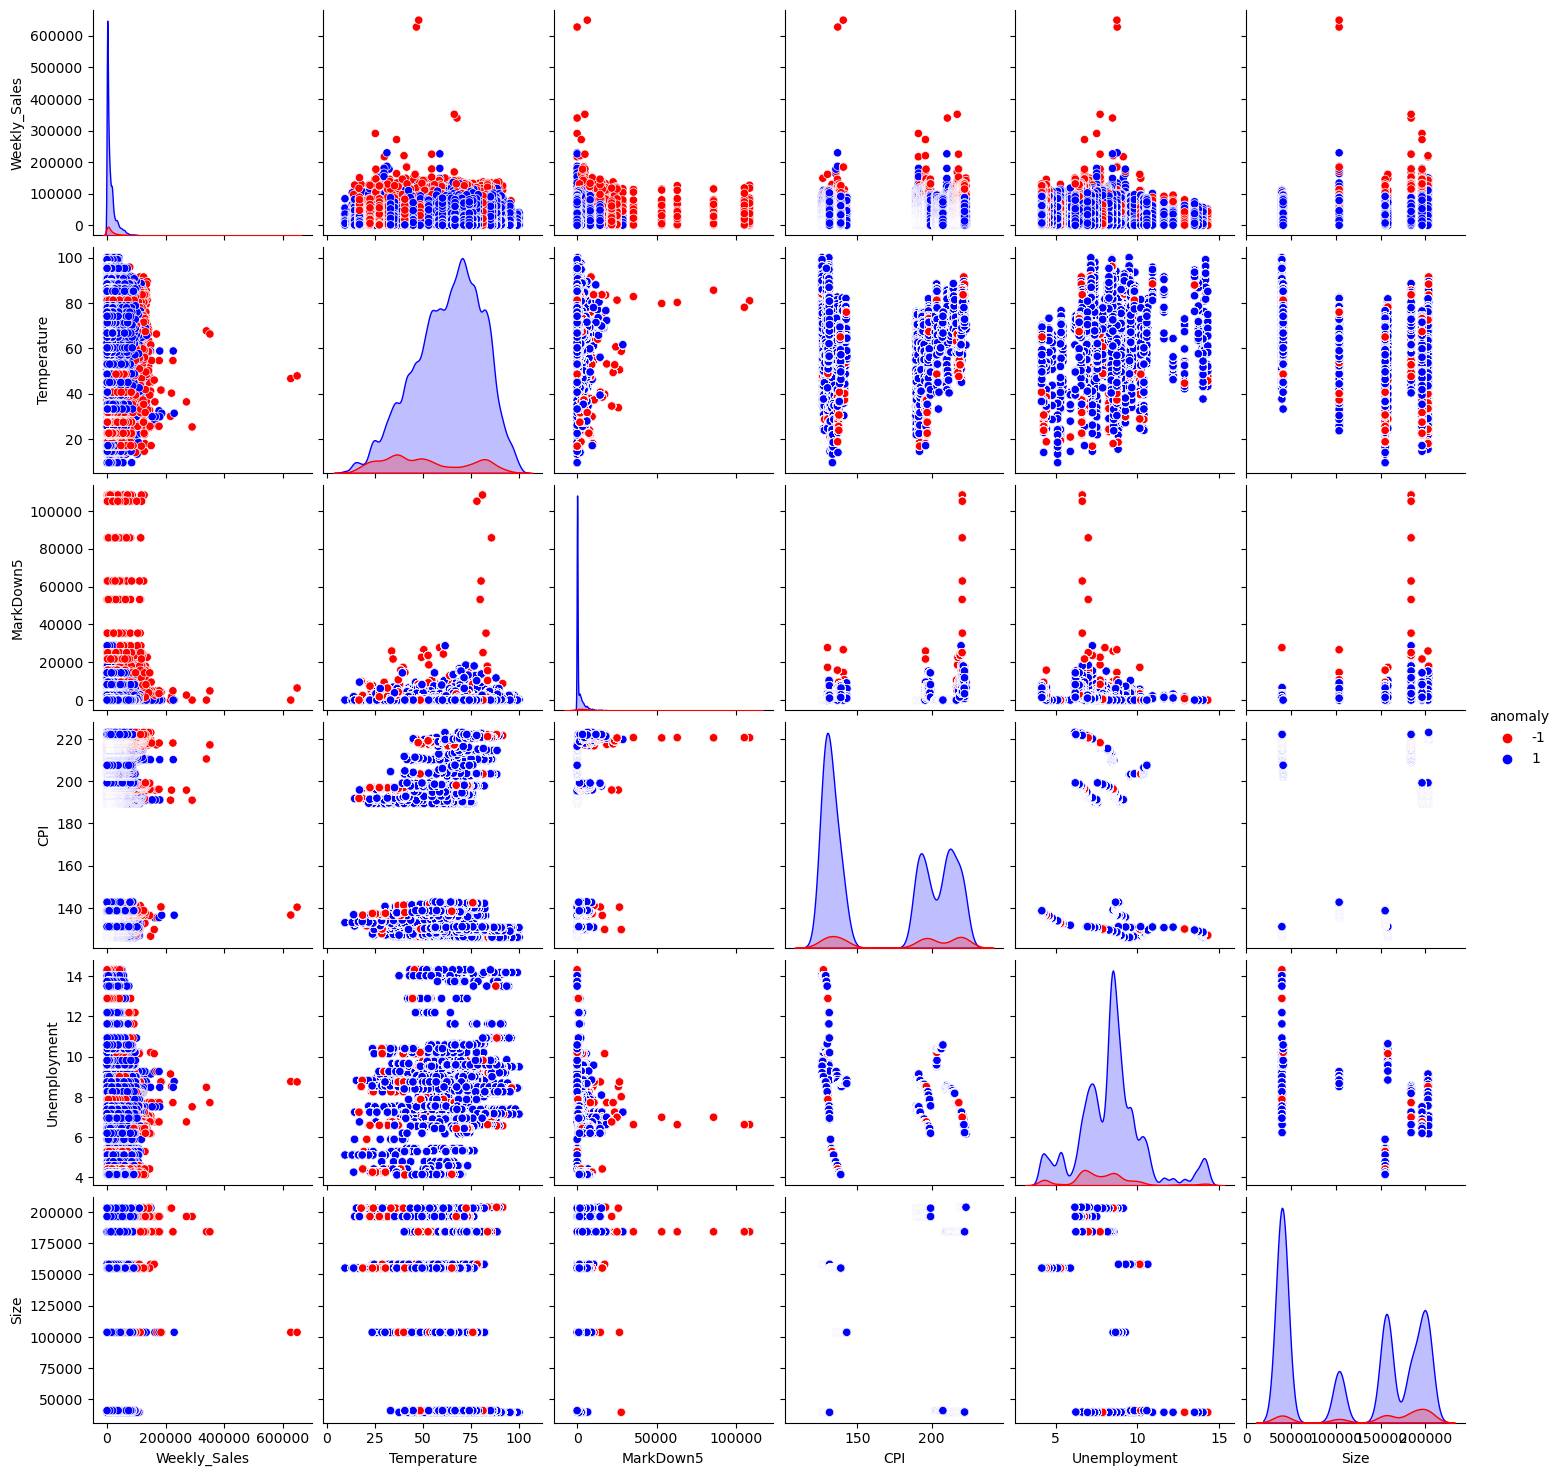

In [44]:
columns_to_plot = [ 'Weekly_Sales', 'Temperature','MarkDown5', 'CPI', 'Unemployment', 'Size']
sns.pairplot(data=df3[300000:400000], vars=columns_to_plot, hue="anomaly", palette=['red','blue'])

### Analyzing Isolation Forest Results for Weekly Sales Anomaly Detection
Upon reviewing the results, a discernible pattern emerges that aligns with our expectations. For instance, when examining the relationship between weekly sales and the "IsHoliday" feature, it becomes evident that the majority of anomalies occur during holiday periods, which intuitively makes sense. Similarly, there's a noticeable increase in anomalies when the markdown initiatives (1 to 5) are high, indicating a correlation between promotional activities and anomaly occurrences.
Isolation Forest often outperforms other anomaly detection methods due to its ability to efficiently isolate anomalies in high-dimensional data spaces. Its effectiveness stems from its capability to identify outliers by exploiting the inherent sparsity of anomalies, making it particularly well-suited for various anomaly detection tasks across diverse datasets.

### 3.3. DBSCAN

In [9]:
from sklearn.cluster import DBSCAN

In [11]:
# DBSCAN model fitting
db = DBSCAN(eps=0.5, min_samples=5)
db.fit(df_scaled)

DBSCAN()

In [12]:
# Adding the cluster labels to the dataframe
df4=df.copy()
df4['DBSCAN_Labels'] = db.labels_

In [13]:
unique, counts = np.unique(db.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Cluster counts:", cluster_counts)

Cluster counts: {-1: 5683, 0: 28792, 1: 129, 2: 7, 3: 130, 4: 6, 5: 202, 6: 135, 7: 136, 8: 66, 9: 131, 10: 64, 11: 64, 12: 67, 13: 69, 14: 68, 15: 68, 16: 70, 17: 63, 18: 63, 19: 133, 20: 68, 21: 63, 22: 6, 23: 64, 24: 6, 25: 70, 26: 68, 27: 64, 28: 67, 29: 130, 30: 5, 31: 67, 32: 66, 33: 132, 34: 4, 35: 126, 36: 12, 37: 66, 38: 131, 39: 5, 40: 137, 41: 407, 42: 205, 43: 338, 44: 66, 45: 62, 46: 65, 47: 135, 48: 67, 49: 64, 50: 132, 51: 69, 52: 69, 53: 65, 54: 64, 55: 137, 56: 65, 57: 137, 58: 42093, 59: 203, 60: 7, 61: 350, 62: 471, 63: 550, 64: 204, 65: 350, 66: 63, 67: 5, 68: 70, 69: 66, 70: 67, 71: 64, 72: 4, 73: 68, 74: 276, 75: 66, 76: 68, 77: 134, 78: 8, 79: 61, 80: 280, 81: 62, 82: 62, 83: 62, 84: 7, 85: 59, 86: 5, 87: 61, 88: 7, 89: 60, 90: 8, 91: 207, 92: 257, 93: 20, 94: 9, 95: 59, 96: 141, 97: 65, 98: 5, 99: 409, 100: 271, 101: 69, 102: 199, 103: 7, 104: 138, 105: 61, 106: 6, 107: 343, 108: 62, 109: 6, 110: 206, 111: 60, 112: 8, 113: 1115, 114: 62, 115: 5, 116: 61, 117: 8,

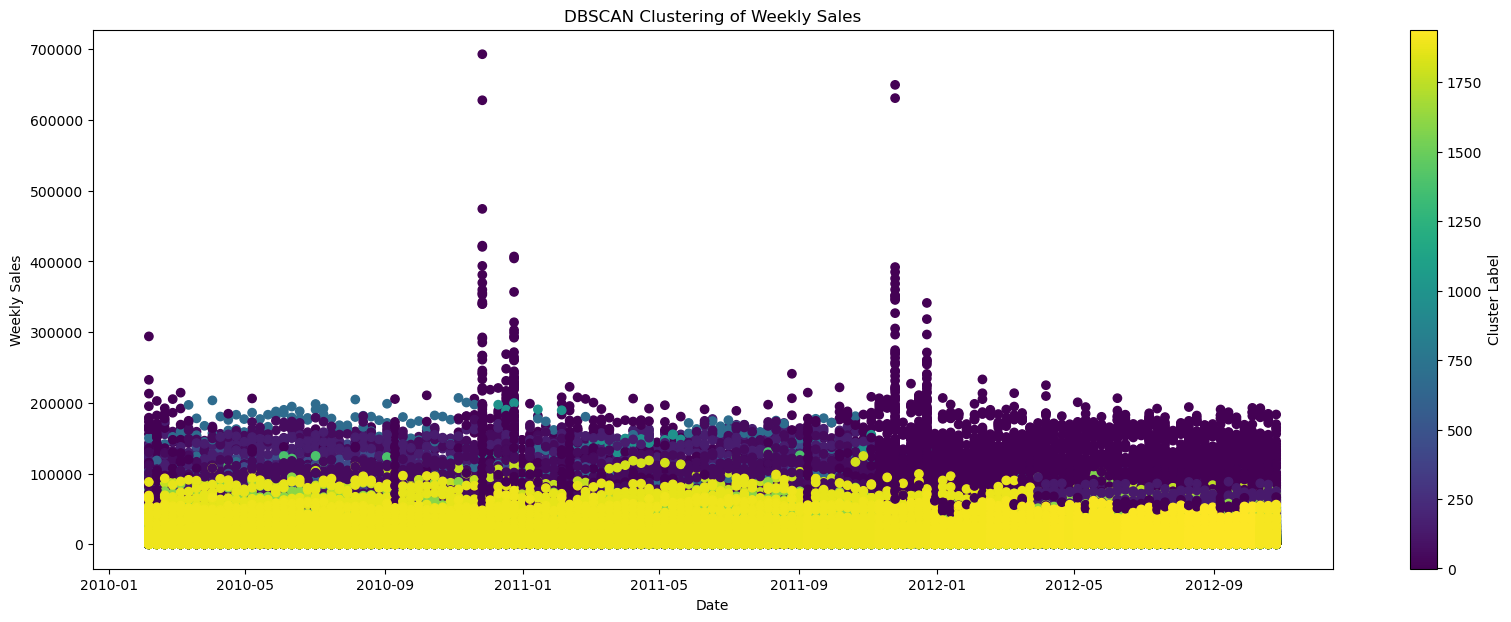

In [14]:
plt.figure(figsize=(20, 7))
plt.scatter(data['Date'], df4['Weekly_Sales'], c=df4['DBSCAN_Labels'], cmap='viridis')
plt.title('DBSCAN Clustering of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.colorbar(label='Cluster Label')
plt.show()

In [15]:
pd.value_counts(df4['DBSCAN_Labels'])

DBSCAN_Labels
432     43813
58      42093
132     34944
158     30724
0       28792
        ...  
994         3
175         3
191         3
744         3
1709        2
Name: count, Length: 1941, dtype: int64

In [15]:
pd.value_counts(df4['DBSCAN_Labels']==-1)

DBSCAN_Labels
False    414602
True       5683
Name: count, dtype: int64

In [17]:
df4[df4['DBSCAN_Labels'] == -1]

IsHoliday  Weekly_Sales  Temperature  Fuel_Price  MarkDown1  \
Date                                                                      
2010-02-05          0     139884.94        42.31       2.572       0.00   
2010-02-12          1      94136.35        38.51       2.548       0.00   
2010-02-12          1     111390.36        38.51       2.548       0.00   
2010-02-12          1     143081.42        38.51       2.548       0.00   
2010-02-19          0     135066.75        39.93       2.514       0.00   
...               ...           ...          ...         ...        ...   
2012-09-14          0      53711.96        67.87       3.948   11407.95   
2012-09-14          0      51602.46        67.87       3.948   11407.95   
2012-09-21          0      50977.95        65.32       4.038    8452.20   
2012-09-21          0      58339.44        65.32       4.038    8452.20   
2012-09-21          0      54160.50        65.32       4.038    8452.20   

            MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
Date                                                                 
2010-02-05       0.00       0.00       0.00       0.00  211.096358   
2010-02-12       0.00       0.00       0.00       0.00  211.242170   
2010-02-12       0.00       0.00       0.00       0.00  211.242170   
2010-02-12       0.00       0.00       0.00       0.00  211.242170   
2010-02-19       0.00       0.00       0.00       0.00  211.289143   
...               ...        ...        ...        ...         ...   
2012-09-14       0.00       4.30    3421.72    5268.92  191.699850   
2012-09-14       0.00       4.30    3421.72    5268.92  191.699850   
2012-09-21      92.28      63.24    2376.38    8670.40  191.856704   
2012-09-21      92.28      63.24    2376.38    8670.40  191.856704   
2012-09-21      92.28      63.24    2376.38    8670.40  191.856704   

            Unemployment    Size  DBSCAN_Labels  
Date                                             
2010-02-05         8.106  151315             -1  
2010-02-12         8.106  151315             -1  
2010-02-12         8.106  151315             -1  
2010-02-12         8.106  151315             -1  
2010-02-19         8.106  151315             -1  
...                  ...     ...            ...  
2012-09-14         8.684  118221             -1  
2012-09-14         8.684  118221             -1  
2012-09-21         8.684  118221             -1  
2012-09-21         8.684  118221             -1  
2012-09-21         8.684  118221             -1  

[5683 rows x 13 columns]

In [18]:
# percantage. of Outliers
sum(df4['DBSCAN_Labels'] == -1)/df.shape[0]*100

1.3521776889491655

In [33]:
### let us now choose another eps and min_samples
db = DBSCAN(eps=0.4, min_samples=10)
db.fit(df_scaled)

DBSCAN(eps=0.4, min_samples=10)

In [34]:
df5=df.copy()
df5['DBSCAN_Labels'] = db.labels_

In [35]:
unique, counts = np.unique(db.labels_, return_counts=True)
cluster_counts = dict(zip(unique, counts))

print("Cluster counts:", cluster_counts)

Cluster counts: {-1: 19694, 0: 9371, 1: 129, 2: 23, 3: 39, 4: 130, 5: 122, 6: 131, 7: 125, 8: 4714, 9: 28, 10: 130, 11: 64, 12: 64, 13: 62, 14: 63, 15: 64, 16: 61, 17: 193, 18: 63, 19: 63, 20: 62, 21: 65, 22: 56, 23: 57, 24: 62, 25: 61, 26: 61, 27: 61, 28: 61, 29: 61, 30: 62, 31: 63, 32: 14, 33: 47, 34: 129, 35: 126, 36: 50, 37: 11, 38: 130, 39: 122, 40: 63, 41: 62, 42: 129, 43: 132, 44: 60, 45: 61, 46: 63, 47: 63, 48: 63, 49: 61, 50: 62, 51: 64, 52: 62, 53: 54, 54: 7, 55: 11, 56: 53, 57: 12, 58: 52, 59: 56, 60: 117, 61: 65, 62: 62, 63: 63, 64: 24027, 65: 121, 66: 46, 67: 34, 68: 197, 69: 132, 70: 29, 71: 134, 72: 122, 73: 14431, 74: 28, 75: 253, 76: 15, 77: 60, 78: 60, 79: 56, 80: 58, 81: 58, 82: 54, 83: 112, 84: 17, 85: 60, 86: 58, 87: 57, 88: 59, 89: 189, 90: 60, 91: 62, 92: 58, 93: 58, 94: 60, 95: 60, 96: 125, 97: 60, 98: 59, 99: 53, 100: 60, 101: 58, 102: 61, 103: 58, 104: 127, 105: 119, 106: 11, 107: 51, 108: 8, 109: 118, 110: 60, 111: 59, 112: 60, 113: 248, 114: 52, 115: 9, 116:

In [36]:
pd.value_counts(df4['DBSCAN_Labels']==-1)

DBSCAN_Labels
False    414602
True       5683
Name: count, dtype: int64

In [37]:
### same results 

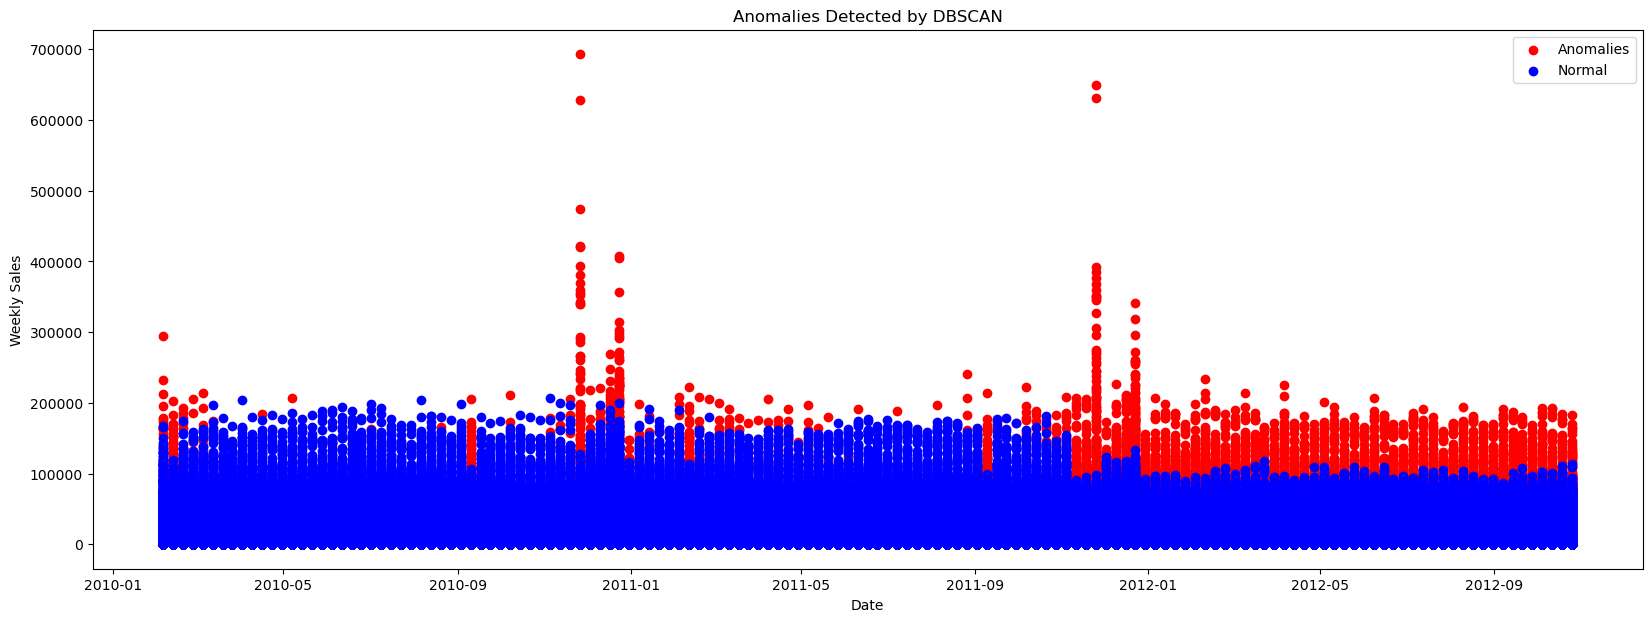

In [39]:
### visualize the anomalies resulted from the DBSCAN
df4.reset_index(inplace=True)
plt.figure(figsize=(20, 7))

# Plot anomalies (label = -1) as red
plt.scatter(df4[df4['DBSCAN_Labels'] == -1]['Date'], 
            df4[df4['DBSCAN_Labels'] == -1]['Weekly_Sales'], 
            c='red', label='Anomalies')

# Plot normal data points as blue
plt.scatter(df4[df4['DBSCAN_Labels'] != -1]['Date'], 
            df4[df4['DBSCAN_Labels'] != -1]['Weekly_Sales'], 
            c='blue', label='Normal')

plt.title('Anomalies Detected by DBSCAN')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

### Analyzing DBSCAN Results for Weekly Sales Anomaly Detection
DBSCAN shows promising results in anomaly detection for our Walmart dataset. However, like KNN, it struggles with identifying anomalies in significant decreases in weekly sales. This limitation may be acceptable depending on our application's focus, such as detecting improvement trends.

### Comparing Anomaly Detection Models
Isolation Forest outperforms both KNN and DBSCAN in our Walmart dataset for anomaly detection. KNN lags behind but can improve with the right K value. DBSCAN falls between KNN and Isolation Forest, offering better performance than KNN but not matching the robustness of Isolation Forest. Isolation Forest's strength lies in its ability to handle high-dimensional data and identify anomalies efficiently, especially when the data is well understood. Additionally, Isolation Forest allows for adjusting the contamination parameter, which represents the expected percentage of anomalies in the data. This flexibility enables fine-tuning to match the specific anomaly detection requirements of the dataset. KNN's performance suffers due to the curse of dimensionality, but tuning the K parameter can enhance its results. Overall, Isolation Forest is the top choice, with KNN and DBSCAN being viable alternatives depending on the specific dataset characteristics and requirements.

In [1]:
print("We have reached the end of this project. Thank you!")

We have reached the end of this project. Thank you!
